In low pass filter, images get blurred or smoothed. but in high pass filter images will be sharpen. Let's see some application of some high pass filters.

# **MT: Combine the vertical and horizontal filtered images from Sobel filtering.**

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [26]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/sudoku.png")
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Sobel vertical and horizontal combined')

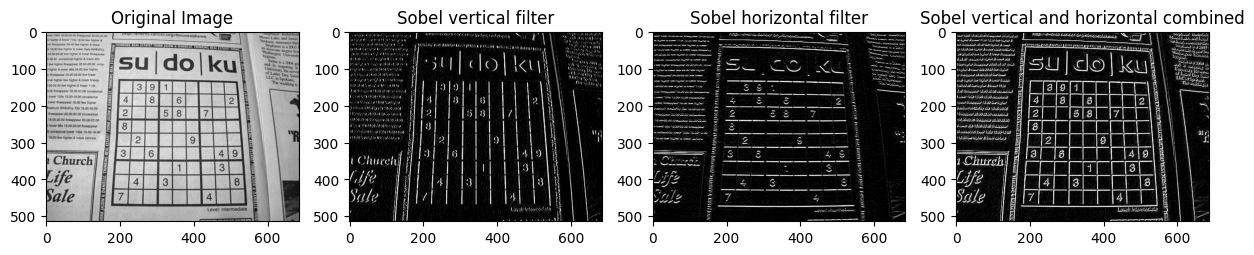

In [27]:
sobel_x = cv2.Sobel(image, -1, 1, 0, 3) #src image, destination depth, horizonral derivative dx, vertical derivative dy, kernel size
sobel_y = cv2.Sobel(image, -1, 0, 1, 3)

sobel_combined = np.maximum(cv2.convertScaleAbs(sobel_x), cv2.convertScaleAbs(sobel_y))
plt.figure(figsize=(15,10))

plt.subplot(1,4,1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1,4,2)
plt.imshow(sobel_x, cmap="gray")
plt.title("Sobel vertical filter")

plt.subplot(1,4,3)
plt.imshow(sobel_y, cmap="gray")
plt.title("Sobel horizontal filter")

plt.subplot(1,4,4)
plt.imshow(sobel_combined, cmap="gray")
plt.title("Sobel vertical and horizontal combined")

# **Optional Tasks**

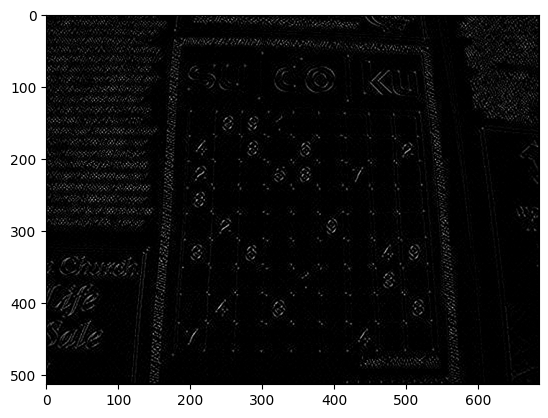

In [12]:
sobel = cv2.Sobel(image, -1, 1, 1, 3)  #if we active both vertical and horizontal derivatives
plt.imshow(sobel, cmap="gray")

Text(0.5, 1.0, 'Laplacian')

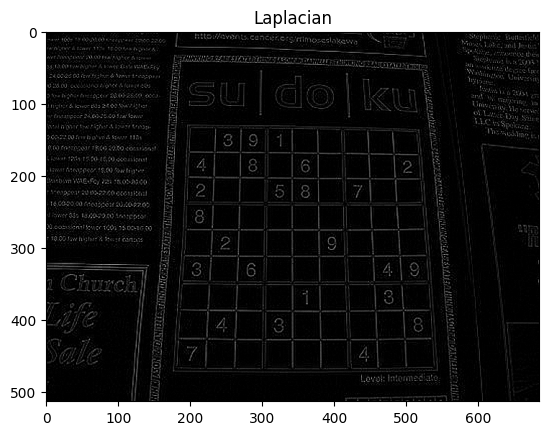

In [13]:
# Laplacian filter

laplacian = cv2.Laplacian(image, -1, 4) #here the third parameter is not ksize, rather it is taking as scale by default. that multiplies the overall result.
plt.imshow(laplacian, cmap="gray")
plt.title("Laplacian")

Text(0.5, 1.0, 'Laplacian')

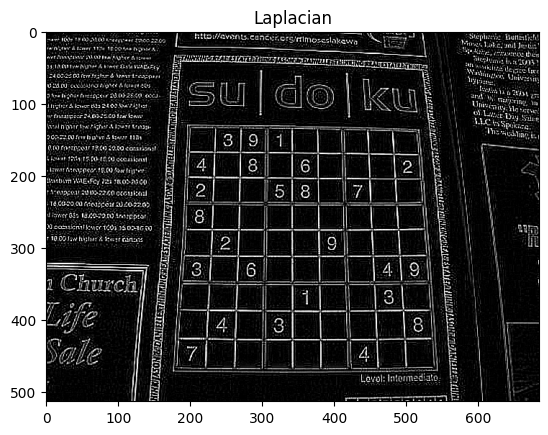

In [14]:
laplacian1 = cv2.Laplacian(image, -1, ksize=3 ) #if we use ksize the edges become sharpen, odd and positive value should be ksize. even value wont work as ksize
plt.imshow(laplacian1, cmap="gray")
plt.title("Laplacian")

In [18]:
laplacian11 = cv2.Laplacian(image, -1, ksize=2 ) # even values wont work as ksize
plt.imshow(laplacian11, cmap="gray")
plt.title("Laplacian")

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/deriv.cpp:104: error: (-211:One of the arguments' values is out of range) The kernel size must be odd and not larger than 31 in function 'getSobelKernels'


Text(0.5, 1.0, 'ksize = 7')

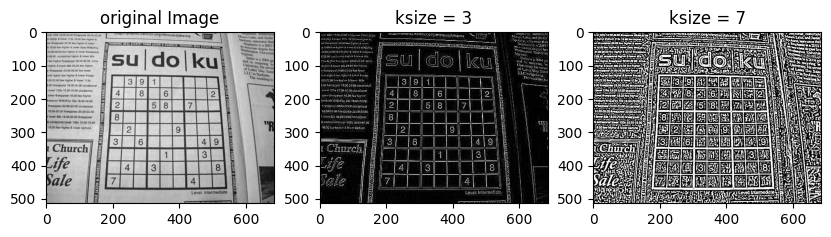

In [17]:
laplacian2 = cv2.Laplacian(image, -1, ksize=3 )
laplacian3 = cv2.Laplacian(image, -1, ksize=7 )

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(image, cmap="gray")
plt.title("original Image")

plt.subplot(1,3,2)
plt.imshow(laplacian2, cmap="gray")
plt.title("ksize = 3")

plt.subplot(1,3,3)
plt.imshow(laplacian3, cmap="gray")
plt.title("ksize = 7")

# **Comparison Between different combination method of horizonal and vertical sobel filters**

Text(0.5, 1.0, 'Gradients magnitude method')

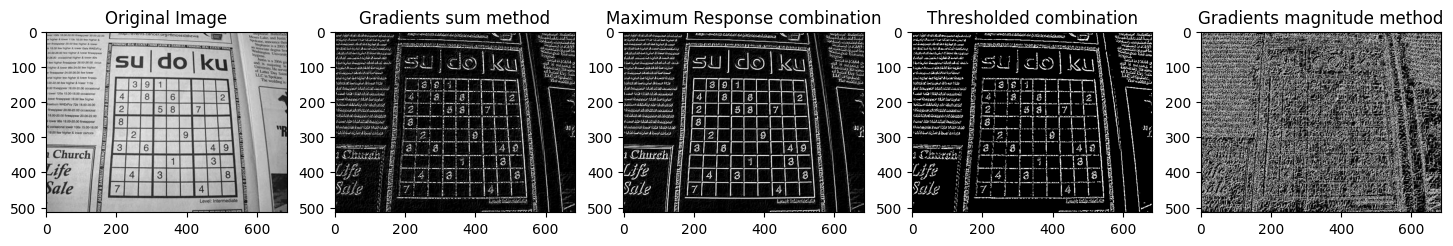

In [25]:
sobel_combined1 = cv2.convertScaleAbs(sobel_x) + cv2.convertScaleAbs(sobel_y)
sobel_combined2 = np.maximum(cv2.convertScaleAbs(sobel_x), cv2.convertScaleAbs(sobel_y))
sobel_combined3 = np.where(sobel_x + sobel_y > 100, 255, 0).astype(np.uint8)

sobel_combined4 = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_combined4 = (sobel_combined4 / sobel_combined4.max() * 255).astype(np.uint8)

plt.figure(figsize=(18,18))

plt.subplot(1,5,1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1,5,2)
plt.imshow(sobel_combined1, cmap="gray")
plt.title("Gradients sum method")

plt.subplot(1,5,3)
plt.imshow(sobel_combined2, cmap="gray")
plt.title("Maximum Response combination")

plt.subplot(1,5,4)
plt.imshow(sobel_combined3, cmap="gray")
plt.title("Thresholded combination")

plt.subplot(1,5,5)
plt.imshow(sobel_combined4, cmap="gray")
plt.title("Gradients magnitude method")